<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.745870,774.095851,866.841721,116.390289,750.451432
1,0.0,1.0,74.830229,-274.336469,-189.506240,106.082175,-295.588415
2,0.0,2.0,56.592909,-27.085625,39.507284,82.332693,-42.825409
3,0.0,3.0,69.403499,66.324120,145.727619,99.015235,46.712384
4,0.0,4.0,52.787625,138.530042,201.317667,77.377275,123.940392
...,...,...,...,...,...,...,...
249995,999.0,245.0,68.902130,381.558377,460.460507,91.021007,369.439499
249996,999.0,246.0,33.951538,22.555101,66.506639,51.925976,14.580663
249997,999.0,247.0,83.602545,337.294611,430.897156,107.464597,323.432559
249998,999.0,248.0,63.067287,-214.568689,-141.501402,84.494269,-225.995671


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.745870,774.095851,866.841721,116.390289,750.451432
1,0.0,1.0,74.830229,-274.336469,-189.506240,106.082175,-295.588415
2,0.0,2.0,56.592909,-27.085625,39.507284,82.332693,-42.825409
3,0.0,3.0,69.403499,66.324120,145.727619,99.015235,46.712384
4,0.0,4.0,52.787625,138.530042,201.317667,77.377275,123.940392
...,...,...,...,...,...,...,...
249995,999.0,245.0,68.902130,381.558377,460.460507,91.021007,369.439499
249996,999.0,246.0,33.951538,22.555101,66.506639,51.925976,14.580663
249997,999.0,247.0,83.602545,337.294611,430.897156,107.464597,323.432559
249998,999.0,248.0,63.067287,-214.568689,-141.501402,84.494269,-225.995671


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    82.745870  774.095851  866.841721  116.390289  750.451432
      1.0    74.830229 -274.336469 -189.506240  106.082175 -295.588415
      2.0    56.592909  -27.085625   39.507284   82.332693  -42.825409
      3.0    69.403499   66.324120  145.727619   99.015235   46.712384
      4.0    52.787625  138.530042  201.317667   77.377275  123.940392
...                ...         ...         ...         ...         ...
999.0 245.0  68.902130  381.558377  460.460507   91.021007  369.439499
      246.0  33.951538   22.555101   66.506639   51.925976   14.580663
      247.0  83.602545  337.294611  430.897156  107.464597  323.432559
      248.0  63.067287 -214.568689 -141.501402   84.494269 -225.995671
      249.0  21.756034 -148.985124 -117.229090   38.284330 -155.513420

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    82.745870  774.095851  866.841721  116.390289  750.451432
      1.0    74.830229 -274.336469 -189.506240  106.082175 -295.588415
      2.0    56.592909  -27.085625   39.507284   82.332693  -42.825409
      3.0    69.403499   66.324120  145.727619   99.015235   46.712384
      4.0    52.787625  138.530042  201.317667   77.377275  123.940392
...                ...         ...         ...         ...         ...
999.0 245.0  68.902130  381.558377  460.460507   91.021007  369.439499
      246.0  33.951538   22.555101   66.506639   51.925976   14.580663
      247.0  83.602545  337.294611  430.897156  107.464597  323.432559
      248.0  63.067287 -214.568689 -141.501402   84.494269 -225.995671
      249.0  21.756034 -148.985124 -117.229090   38.284330 -155.513420

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.745870,774.095851,866.841721,116.390289,750.451432
1,0.0,1.0,74.830229,-274.336469,-189.506240,106.082175,-295.588415
2,0.0,2.0,56.592909,-27.085625,39.507284,82.332693,-42.825409
3,0.0,3.0,69.403499,66.324120,145.727619,99.015235,46.712384
4,0.0,4.0,52.787625,138.530042,201.317667,77.377275,123.940392
...,...,...,...,...,...,...,...
249995,999.0,245.0,68.902130,381.558377,460.460507,91.021007,369.439499
249996,999.0,246.0,33.951538,22.555101,66.506639,51.925976,14.580663
249997,999.0,247.0,83.602545,337.294611,430.897156,107.464597,323.432559
249998,999.0,248.0,63.067287,-214.568689,-141.501402,84.494269,-225.995671


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    82.745870  774.095851  866.841721  116.390289  750.451432
      1.0    74.830229 -274.336469 -189.506240  106.082175 -295.588415
      2.0    56.592909  -27.085625   39.507284   82.332693  -42.825409
      3.0    69.403499   66.324120  145.727619   99.015235   46.712384
      4.0    52.787625  138.530042  201.317667   77.377275  123.940392
...                ...         ...         ...         ...         ...
999.0 245.0  68.902130  381.558377  460.460507   91.021007  369.439499
      246.0  33.951538   22.555101   66.506639   51.925976   14.580663
      247.0  83.602545  337.294611  430.897156  107.464597  323.432559
      248.0  63.067287 -214.568689 -141.501402   84.494269 -225.995671
      249.0  21.756034 -148.985124 -117.229090   38.284330 -155.513420

[250000 rows x 5 columns]

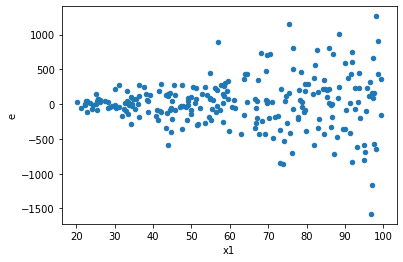

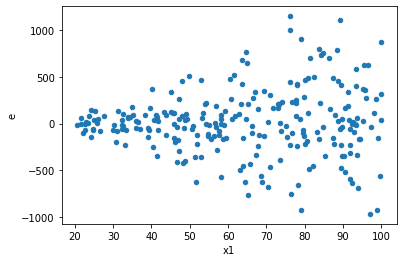

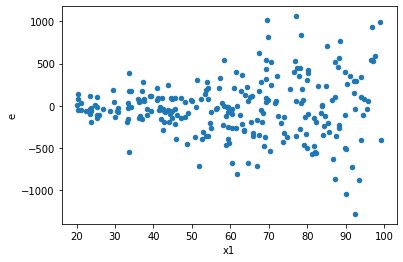

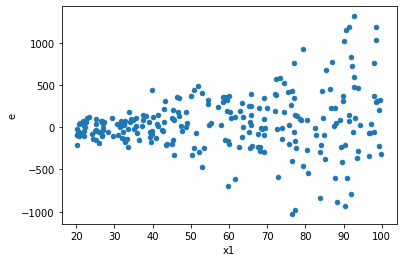

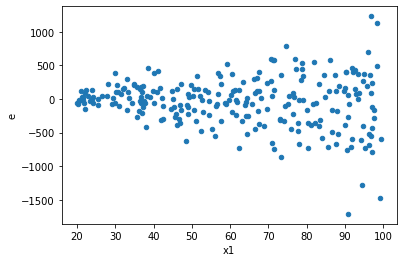

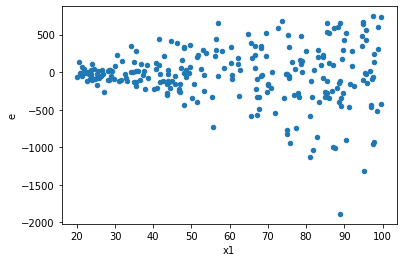

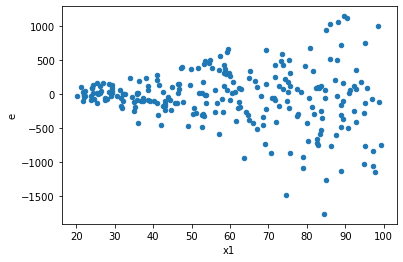

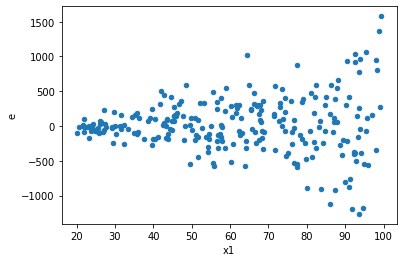

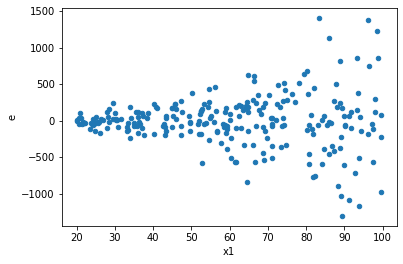

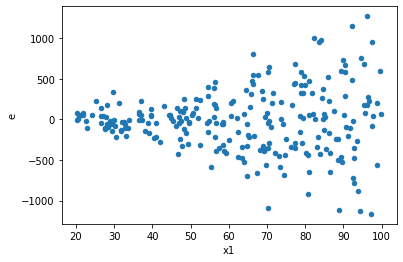

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,2439647.699018602,24720077.749930054,24642.90605069295,249697.75504979852,10.13264241385107,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,3368472.143294017,19747742.528024655,34024.971144384006,199472.14674772377,5.862522142965804,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,3180912.351027664,21436677.511139587,32130.42778815822,216532.09607211704,6.739160072805526,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,1610561.131819427,23182293.264973134,16268.294260802293,234164.57843407206,14.393923215310952,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,2636095.6092414632,26395085.286397934,26627.228376176397,266617.02309492865,10.012946872588254,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,3580316.2493915725,30677511.30015455,36164.810599914876,309873.85151671263,8.568380322651047,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,1752944.3239389528,25986741.706391767,17706.508322615686,262492.3404686037,14.824624690873392,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,99.0,99.0,2835345.1283358987,26054621.93103075,28639.849781170695,263177.9993033409,9.189224151460724,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,99.0,99.0,3216936.159186567,23871661.922133338,32494.30463824815,241127.89820336705,7.420620348328428,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,2439647.699018602,24720077.749930054,24642.90605069295,249697.75504979852,10.13264241385107,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,3368472.143294017,19747742.528024655,34024.971144384006,199472.14674772377,5.862522142965804,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,3180912.351027664,21436677.511139587,32130.42778815822,216532.09607211704,6.739160072805526,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,1610561.131819427,23182293.264973134,16268.294260802293,234164.57843407206,14.393923215310952,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,26057032.782750115,3507766.7786312154,263202.35134091025,35431.98766294157,0.13461881127744424,1.9062716455981082e-20,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,2636095.6092414632,26395085.286397934,26627.228376176397,266617.02309492865,10.012946872588254,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,32942418.30518025,2844693.932852615,332751.7000523258,28734.282150026414,0.08635352470177582,3.6571546917621537e-28,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,3580316.2493915725,30677511.30015455,36164.810599914876,309873.85151671263,8.568380322651047,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,1752944.3239389528,25986741.706391767,17706.508322615686,262492.3404686037,14.824624690873392,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64